# Load and Plot Lightnovo Raman Spectra

## Lightnovo ApS

info@lightnovo.com

https://lightnovo.com/

In [1]:
# load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# set parameters of seaborn for publication quality plots
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
# class for Raman spectral data loading and visualization
class raman_spectrum:
    # class constructor
    def __init__(self,fname):
        self.fname = fname
        self.fname0 = self.fname.split('/')[-1]
        self.df = pd.read_csv(fname + '.tsv', sep='\t', header =7)
        self.df.rename(columns={'Wavenumber [cm^-1]':'Raman Shift, cm-1', 'Raman [%]':'Intensity, %'}, inplace = True) #rename columns
        self.normalize() #normalize data
           
    #function to normalize data (min max normalization)
    def normalize(self):
        self.df["Normalized Intensity"] = (self.df["Intensity, %"] - ( min0:=self.df["Intensity, %"].min()) )/(self.df["Intensity, %"].max() - min0) 
        
    #function to plot raw data        
    def plot(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Intensity, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    #function to plot normalized data
    def plot_n(self, color, label, marker = None):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Normalized Intensity", marker = marker, color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 

In [4]:
dir_path = "Data/2024-12-06_test_data_miniRaman" #directory with Raman data

In [5]:
notebook_dir = os.getcwd() #Jupyter notebook directory
os.chdir(dir_path)         #go to directory with data

files = os.listdir()       #list all files in directory with data
files.sort(key=lambda x: os.path.getmtime(x)) #sort files by date/time

In [6]:
for f in files: print(f) #print file names in data directory

polystyrene.tsv
paracetamol.tsv


In [7]:
# file names without .tsv extension
f_polystyrene = "polystyrene" 
f_paracetamol = "paracetamol"

In [8]:
# laad spectra
s_polystyrene = raman_spectrum(f_polystyrene)
s_paracetamol = raman_spectrum(f_paracetamol)

In [9]:
os.chdir(notebook_dir) #go back to notebook directory

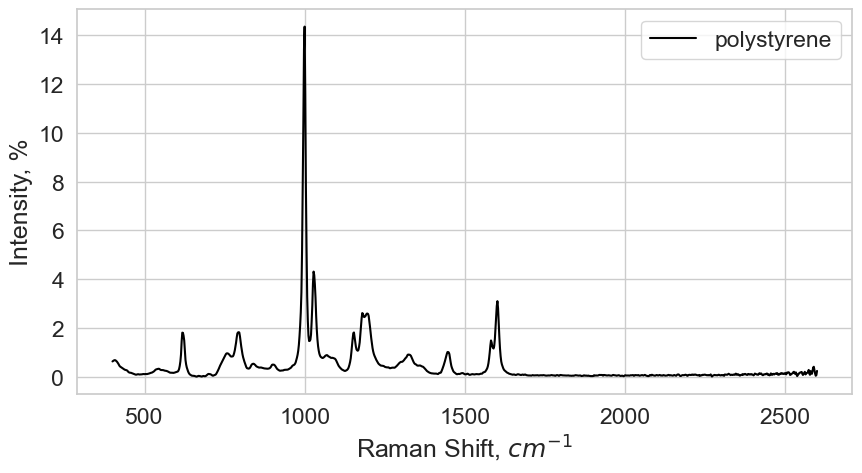

In [10]:
# plot polystyrene spectrum
plt.figure(figsize = (10,5)) #figure size
s_polystyrene.plot(label = "polystyrene", color = "black")
plt.savefig('polystyrene.png', dpi = 300, bbox_inches='tight') #save figure in .png format

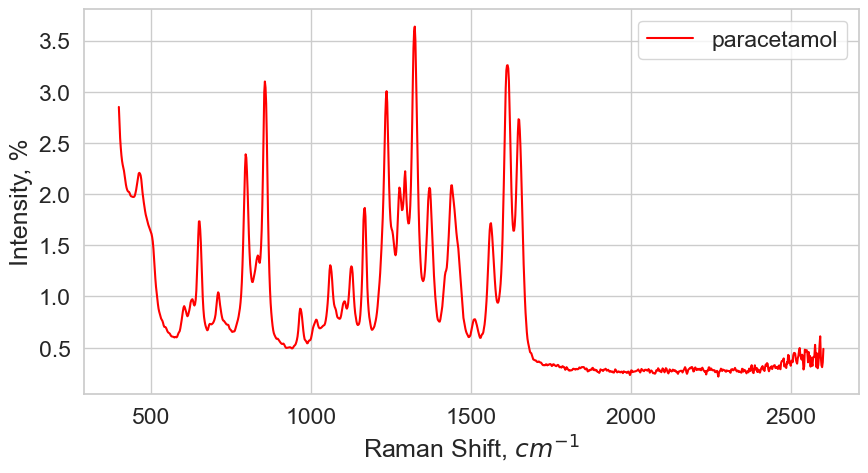

In [11]:
# plot paracetamol spectrum
plt.figure(figsize = (10,5)) #figure size
s_paracetamol.plot(label = "paracetamol", color = "red")
plt.savefig('paracetamol.png', dpi = 300, bbox_inches='tight') #save figure in .png format

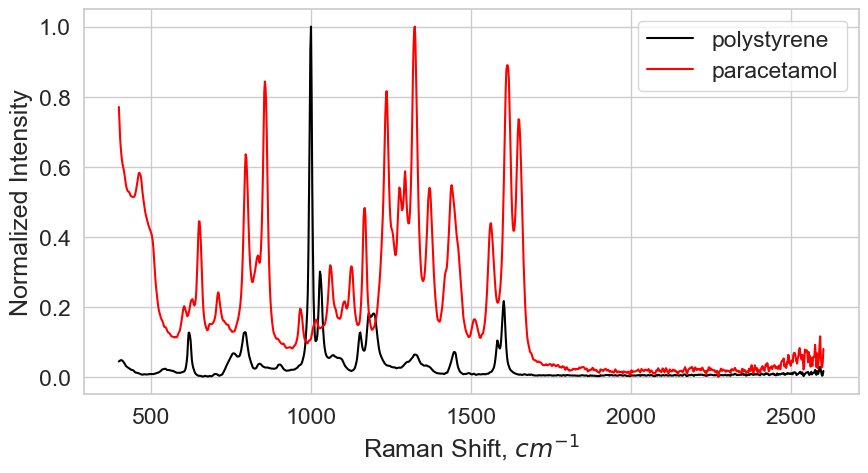

In [12]:
# plot two normalized spectra together
plt.figure(figsize = (10,5)) #figure size
s_polystyrene.plot_n(label = "polystyrene", color = "black")
s_paracetamol.plot_n(label = "paracetamol", color = "red")
plt.savefig('all.png', dpi = 300, bbox_inches='tight') #save figure in .png format

Copyright 2024 Lightnovo ApS

Licensing information: MIT License